<a href="https://colab.research.google.com/github/guilhermelaviola/BusinessIntelligenceAndBigDataArchitectureWithAppliedDataScience/blob/main/Class03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimensional Modeling**
Dimensional Modeling is a data organization approach designed to optimize the analysis of large datasets, particularly in Business Intelligence and Big Data environments. It structures data around facts and dimensions within a centralized Data Warehouse, enabling intuitive analysis through concepts like data cubes, measures, dimensions, hierarchies, and attributes. By using techniques such as denormalization, indexing, and data aggregation, Dimensional Modeling improves query performance and analytical efficiency. Supported by tools like OLAP and Python libraries such as Pandas, Xarray, and Matplotlib, this approach helps analysts and data professionals extract meaningful insights and make informed decisions from complex business data.

In [4]:
# Importing all the necessary libraries and resources:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## **Example: Data Structuring**
Below we explore how to structure data in an intuitive and effective way, using dimensions and facts to speed up analysis and facilitate understanding.

In [5]:
pd.set_option('display.max_columns', None)

rl = 'https://raw.githubusercontent.com/sushantag9/Supermarket-Sales-Data-Analysis/refs/heads/master/supermarket_sales%20-%20Sheet1.csv'

# Importing the DataFrame and displaying it:
df = pd.read_csv(url)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


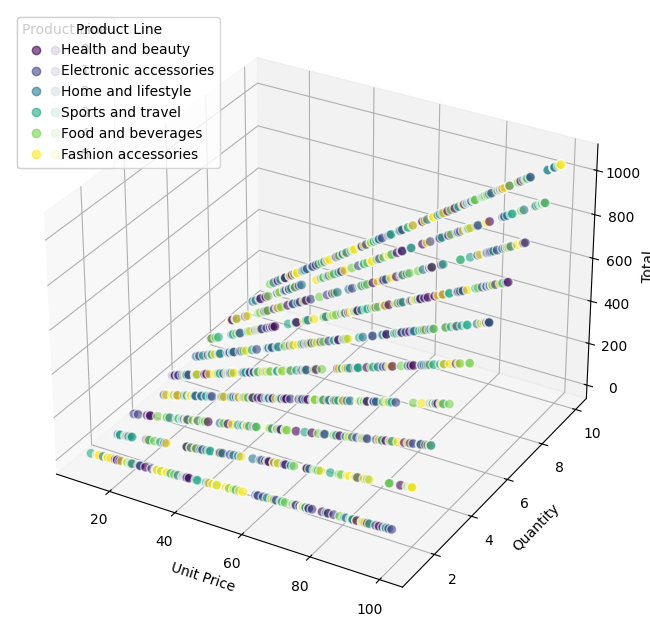

In [6]:
# Mapping the kinds of products into a numerical value and generating a new column for colors:
unique_product_types = df['Product line'].unique()
product_type_colors = range(len(unique_product_types))
colors_map = dict(zip(unique_product_types, product_type_colors))
df['Product line color'] = df['Product line'].map(colors_map)

# Creating the chart:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot:
scatter = ax.scatter(
    df['Unit price'],
    df['Quantity'],
    df['Total'],
    c=df['Product line color'],  # Color based in the product type
    s=50,                       # Fixed size of points, can be ajusted accordingly
    cmap='viridis',             # Map of colors
    alpha=0.6,
    edgecolors='w'
)

# Titles and labels:
ax.set_xlabel('Unit Price')
ax.set_ylabel('Quantity')
ax.set_zlabel('Total')

# Captions for the types of products:
legend1 = ax.legend(*scatter.legend_elements(), title='Product Line')
ax.add_artist(legend1)

# Creating captions based in the product types names:
handles, labels = scatter.legend_elements(prop='colors', alpha=0.6)
legend2 = ax.legend(handles, unique_product_types, title='Product Line', loc='upper left')

# Displaying the chart:
plt.show()